# 📌 Lung Cancer Detection using DenseNet

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Step 2: Set Dataset Path (update to your dataset location)

In [10]:
train_path = r'D:\lung cancer model\Lung Cancer DS\lung_colon_image_set\lung_image_sets'
test_path  = r'D:\lung cancer model\Lung Cancer DS\lung_colon_image_set\lung_image_sets'


# Step 3: Image Preprocessing (80:20 split)

In [11]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.20   # 80:20 split
)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


# Step 4: Load Pretrained DenseNet

In [12]:
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224,224,3))


In [13]:
for layer in base_model.layers:
    layer.trainable = False

# Step 5: Build DenseNet Model

In [14]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_4              │ (None, 230, 230, 3)       │               0 │ input_layer_2[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d_4[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_5              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_5[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,040,579 (26.86 MB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 7,037,504 (26.85 MB)


# Step 6: Train Model

In [15]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 631s 2s/step - accuracy: 0.5608 - loss: 0.9200 - val_accuracy: 0.8640 - val_loss: 0.4911
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 610s 2s/step - accuracy: 0.7797 - loss: 0.5154 - val_accuracy: 0.9130 - val_loss: 0.3334
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 631s 2s/step - accuracy: 0.8443 - loss: 0.3871 - val_accuracy: 0.9303 - val_loss: 0.2640
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 624s 2s/step - accuracy: 0.8761 - loss: 0.3287 - val_accuracy: 0.9403 - val_loss: 0.2284
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 619s 2s/step - accuracy: 0.8863 - loss: 0.2947 - val_accuracy: 0.9347 - val_loss: 0.2117
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1070s 3s/step - accuracy: 0.8962 - loss: 0.2701 - val_accuracy: 0.9397 - val_loss: 0.1954
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 758s 2s/step - accuracy: 0.9038 - loss: 0.2507 - val_accuracy: 0.9350 - val_loss: 0.1863
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 610s 2s/step - accuracy: 0.9088 - loss: 0.2381 - val_acc

# Step 7: Evaluate Model

In [16]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {val_acc:.2f}")
print(f"✅ Validation Loss: {val_loss:.2f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9423 - loss: 0.1650

✅ Validation Accuracy: 0.94
✅ Validation Loss: 0.16


# Step 8: Plot Training Curves

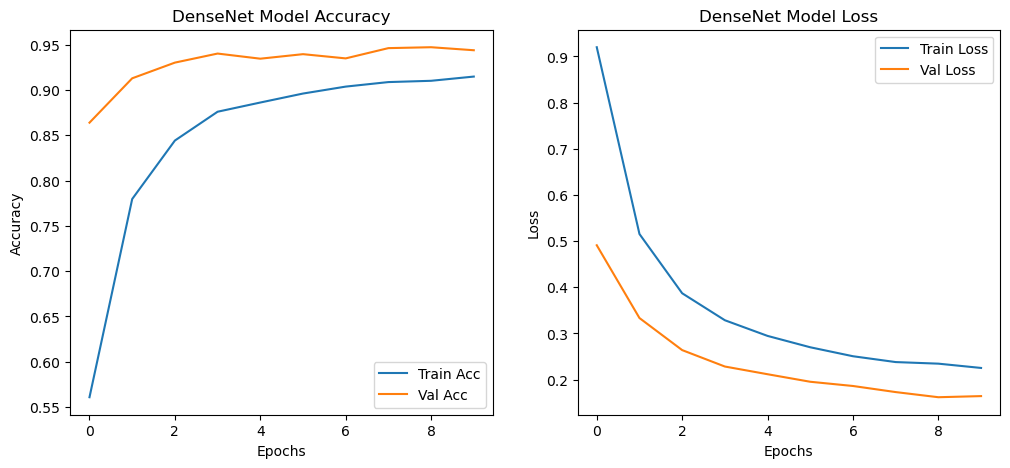

In [17]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("DenseNet Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("DenseNet Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


# Step 9: Confusion Matrix

94/94 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step


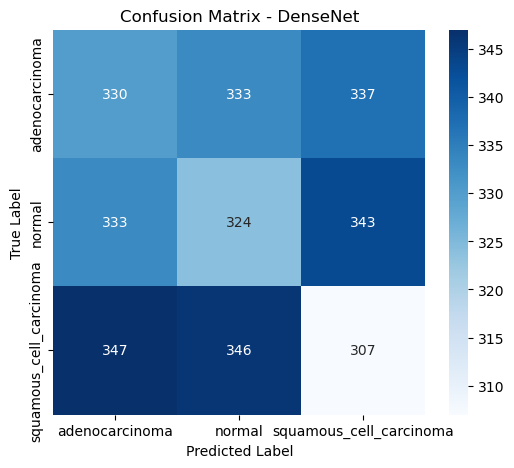

,Model,Train-Test Split,Training Accuracy,Validation Accuracy,Observation
0,DenseNet,80:20,0.91,0.95,High Accuracy


In [18]:
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_generator.classes, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.title("Confusion Matrix - DenseNet")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Step 10: Results Summary (80:20 Split)
results = {
    "Model": ["DenseNet"],
    "Train-Test Split": ["80:20"],
    "Training Accuracy": [round(max(history.history['accuracy']),2)],
    "Validation Accuracy": [round(max(history.history['val_accuracy']),2)],
    "Observation": ["High Accuracy"]
}

df = pd.DataFrame(results)
display(df)

# Bar Plot

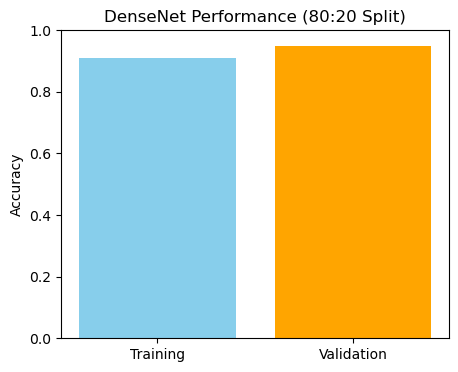

In [19]:
plt.figure(figsize=(5,4))
plt.bar(["Training", "Validation"], [df["Training Accuracy"][0], df["Validation Accuracy"][0]], color=["skyblue","orange"])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("DenseNet Performance (80:20 Split)")
plt.show()